<a href="https://colab.research.google.com/github/iotparth/Image-Caption-Generator/blob/master/Image_Captioning_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing import image, sequence


Using TensorFlow backend.


In [ ]:
!wget https://www.dropbox.com/s/2tjl872vrqm2xy7/Desktop.zip?dl=0

--2020-05-31 07:36:50--  https://www.dropbox.com/s/2tjl872vrqm2xy7/Desktop.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2tjl872vrqm2xy7/Desktop.zip [following]
--2020-05-31 07:36:50--  https://www.dropbox.com/s/raw/2tjl872vrqm2xy7/Desktop.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb11ec351a579692ffe3e461c28.dl.dropboxusercontent.com/cd/0/inline/A4tUMgiVcKi_5Opr7Ei7P9cFzoshwO38KAmerCu6MqR9CoblsOzQWAMZ5FcGKWTMJib0IU0Y0UvWQVj3O2Er9yf8LmsVVXUK8v4Vc8KF2MtX5yAkA7r4ucD3vh-f3wXzNDI/file# [following]
--2020-05-31 07:36:51--  https://ucb11ec351a579692ffe3e461c28.dl.dropboxusercontent.com/cd/0/inline/A4tUMgiVcKi_5Opr7Ei7P9cFzoshwO38KAmerCu6MqR9CoblsOzQWAMZ5FcGKWTMJib0IU0Y0UvWQVj3O2Er9yf8LmsVVXUK8v4Vc8KF2MtX5

In [ ]:
!unzip Desktop.zip?dl=0

Archive:  Desktop.zip?dl=0
  inflating: 2a.JPG                  
  inflating: Flickr_8k.trainImages.txt  
  inflating: model_weights.h5        
  inflating: train_encoded_images.p  


In [ ]:
pd_dataset = pd.read_csv("Flickr_8k.trainImages.txt", delimiter='\t')
ds = pd_dataset.values
print (ds.shape)

(30000, 2)


In [ ]:
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print (len(sentences))

30000


In [ ]:
words = [i.split() for i in sentences]

In [ ]:
unique = []
for i in words:
    unique.extend(i)

In [ ]:
unique = list(set(unique))
print (len(unique))

vocab_size = len(unique)

8253


In [ ]:
#Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [ ]:
word_2_indices['UNK'] = 0
word_2_indices['raining'] = 8253

indices_2_word[0] = 'UNK'
indices_2_word[8253] = 'raining'

In [ ]:
print (word_2_indices['<start>'])
print (indices_2_word[4011])
print (word_2_indices['<end>'])
print (indices_2_word[8051])

4859
brindle
3150
cavern


In [ ]:
vocab_size = len(word_2_indices.keys())
print (vocab_size)

8254


In [ ]:
max_len = 0

for i in sentences:
    i = i.split()
    if len(i) > max_len:
        max_len = len(i)

print (max_len)

40


In [ ]:
padded_sequences, subsequent_words = [], []

for ix in range(ds.shape[0]):
    partial_seqs = []
    next_words = []
    text = ds[ix, 1].split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print (padded_sequences.shape)
print (subsequent_words.shape)

(30000,)
(30000,)


In [ ]:
print (padded_sequences[0])

[[4859    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4859 2058    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4859 2058 3100    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4859 2058 3100 2599    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4859 2058 3100 2599 1534    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  

In [ ]:
for ix in range(len(padded_sequences[0])):
    for iy in range(max_len):
        print (indices_2_word[padded_sequences[0][ix][iy]],end = ' ')
    print ("\n")

print (len(padded_sequences[0]))

<start> UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A black UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A black dog UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A black dog is UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A black dog is running UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<sta

In [ ]:
num_of_images = 2000

In [ ]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

for ix in range(num_of_images):#img_to_padded_seqs.shape[0]):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])

np.save("./captions.npy", captions)
np.save("./next_words.npy", next_words)

print (captions.shape)
print (next_words.shape)

(25493, 40)
(25493, 8254)


In [ ]:
with open('./train_encoded_images.p', 'rb') as f:
        encoded_images = pickle.load(f)

In [ ]:
imgs = []

for ix in range(ds.shape[0]):
    if ds[ix, 0] in encoded_images.keys():
        imgs.append(list(encoded_images[ds[ix, 0]]))

imgs = np.asarray(imgs)
print (imgs.shape)

(15000, 2048)


In [ ]:
images = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)

np.save("./images.npy", images)

print (images.shape)

(25493, 2048)


In [ ]:
image_names = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("./image_names.npy", image_names)

print (len(image_names))

25493


In [ ]:
from keras.preprocessing import image, sequence
from keras.layers import Dense, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import ResNet50
from keras.utils import plot_model
import pickle
import pandas as pd
from IPython.display import Image, display

In [ ]:
captions = np.load("./captions.npy")
next_words = np.load("./next_words.npy")

print (captions.shape)
print (next_words.shape)

(25493, 40)
(25493, 8254)


In [ ]:
images = np.load("./images.npy")

print (images.shape)

(25493, 2048)


In [ ]:
imag = np.load("./image_names.npy")
        
print (imag.shape)

(25493,)


In [ ]:
embedding_size = 128
max_len = 40

In [ ]:
image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 40, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


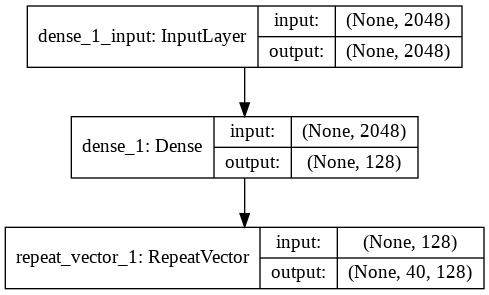

In [ ]:
plot_model(image_model, show_shapes=True, to_file='image_model.png')

In [ ]:
language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 128)           1056512   
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 256)           394240    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 128)           32896     
Total params: 1,483,648
Trainable params: 1,483,648
Non-trainable params: 0
_________________________________________________________________


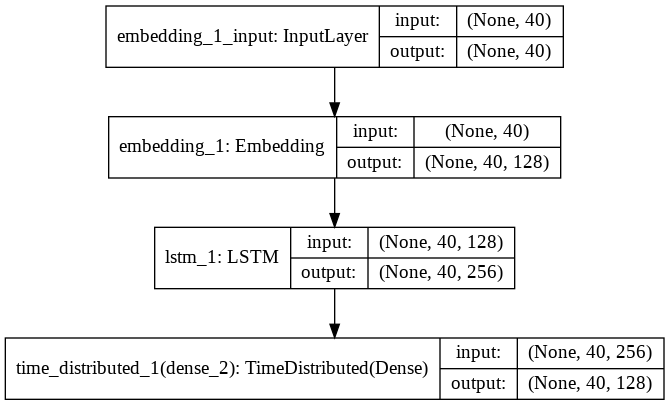

In [ ]:
plot_model(language_model, show_shapes=True, to_file='language_model.png')

In [ ]:
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

model.load_weights("./model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_1_input (InputLayer)  (None, 40)           0                                            
__________________________________________________________________________________________________
dense_1_input (InputLayer)      (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 128)      1056512     embedding_1_input[0][0]          
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          262272      dense_1_input[0][0]              
____________________________________________________________________________________________

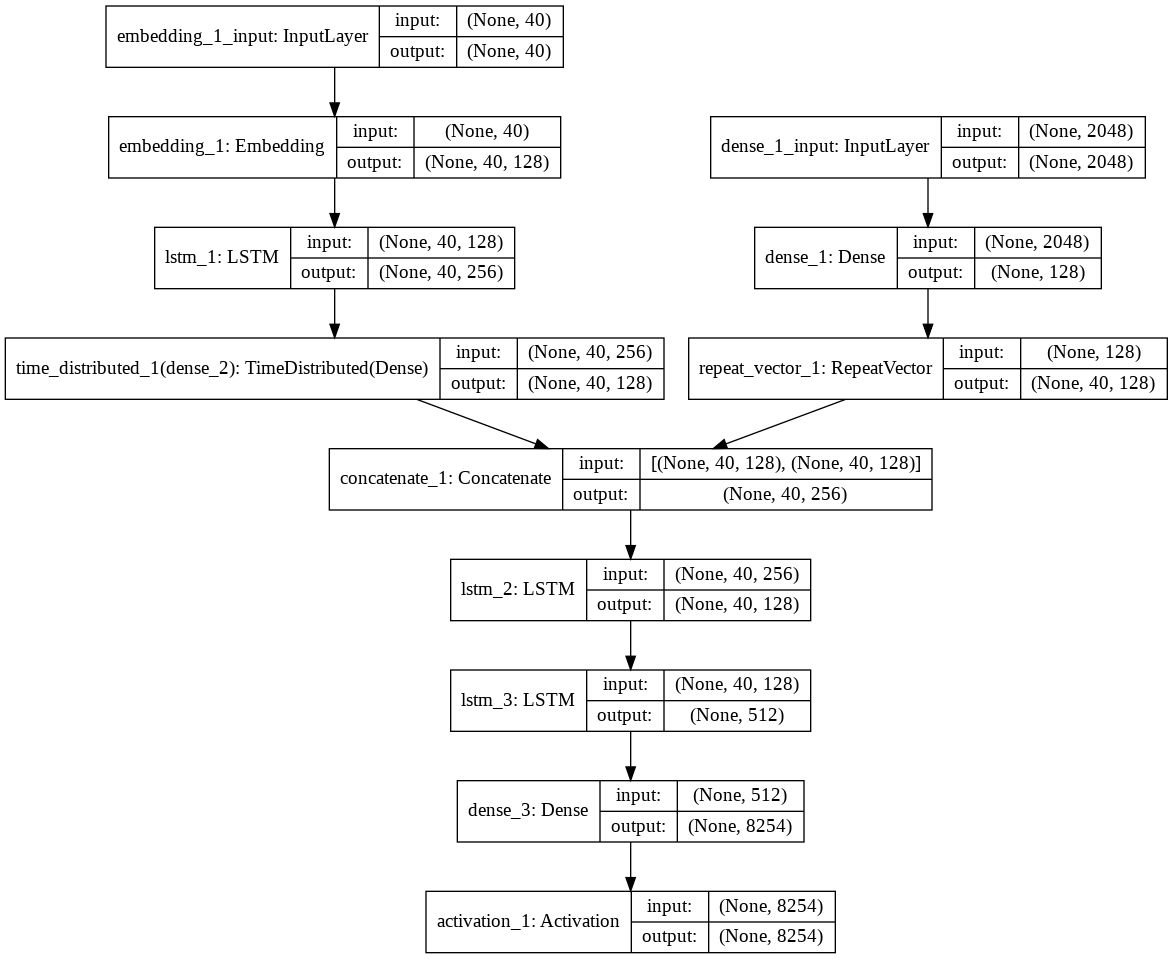

In [ ]:
plot_model(model, show_shapes=True, to_file='image_cap_model.png')

In [ ]:
hist = model.fit([images, captions], next_words, batch_size=512, epochs=75)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/75
25493/25493 [==============================] - 14s 538us/step - loss: 6.4834 - accuracy: 0.1067
Epoch 2/75
25493/25493 [==============================] - 11s 439us/step - loss: 4.8115 - accuracy: 0.1635
Epoch 3/75
25493/25493 [==============================] - 11s 426us/step - loss: 4.4572 - accuracy: 0.1958
Epoch 4/75
25493/25493 [==============================] - 11s 429us/step - loss: 4.1147 - accuracy: 0.2470
Epoch 5/75
25493/25493 [==============================] - 11s 430us/step - loss: 3.8534 - accuracy: 0.2785
Epoch 6/75
25493/25493 [==============================] - 11s 426us/step - loss: 3.6252 - accuracy: 0.3022
Epoch 7/75
25493/25493 [==============================] - 11s 423us/step - loss: 3.4471 - accuracy: 0.3176
Epoch 8/75
25493/25493 [==============================] - 11s 426us/step - loss: 3.2753 - accuracy: 0.3309
Epoch 9/75
25493/25493 [==============================] - 11s 428us/step - loss: 3.1160 - accuracy: 0.3465
Epoch 10/75
25493/25493 [============

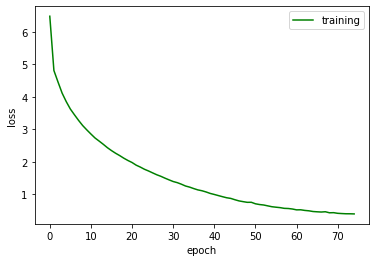

In [ ]:
import matplotlib.pyplot as plt
#lt.figure(0)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(hist.history['loss'],'g')
plt.legend(['training'])
plt.savefig('imgcap_loss_plots.png')
plt.show()

In [ ]:
# plt.figure(1)
# plt.xlabel("epoch")
# plt.ylabel("accuracy")
# plt.plot(hist.history['acc'],'r')
# plt.legend(['training'])
# plt.savefig('imgcap_accuracy_plots.png')
# plt.show()

In [ ]:
model.save_weights("./model_weights.h5")

In [ ]:
## pred

In [ ]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [ ]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [ ]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

94658560/94653016 [==============================] - 4s 0us/step


In [ ]:
img = "1test.jpg"
#img = "/home/vasu/Downloads/aaaaaaa.jpeg"
test_img = get_encoding(resnet, img)

In [ ]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

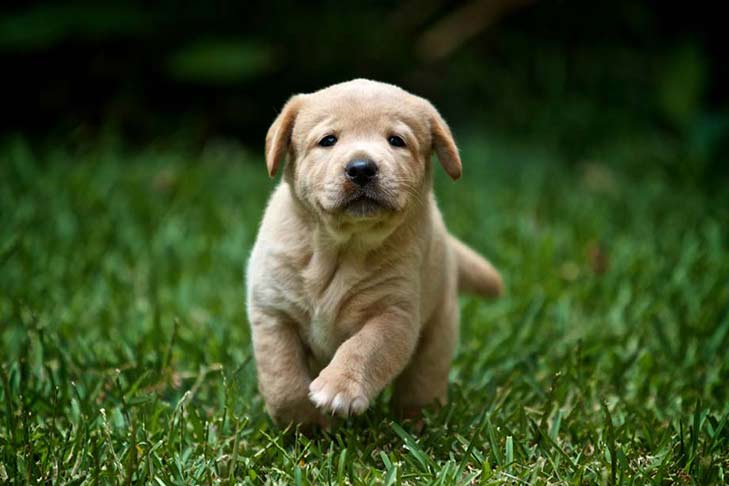

A black and white dog runs through the grass .


In [ ]:
z = Image(filename=img)
display(z)

print (Argmax_Search)